In [11]:
import pandas as pd
import datetime

In [13]:
#First we should cehck the Autocorrelation of APPL Stock since we are using a regression model
df = pd.read_csv("../data/processed/appl_stock_values.csv")

#split the data
df["Date"] = pd.to_datetime(df["Date"])
test = df[df["Date"] > datetime.datetime(2021, 1, 1)]






,Unnamed: 0,Date,Open,High,Low,Close,Volume
9151,760,2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900
9152,761,2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900
9153,762,2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000
9154,763,2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200
9155,764,2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200
...,...,...,...,...,...,...,...
9392,1001,2021-12-16,179.279999,181.139999,170.750000,172.259995,150185800
9393,1002,2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
9394,1003,2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100
9395,1004,2021-12-21,171.559998,173.199997,169.119995,172.990005,91185900


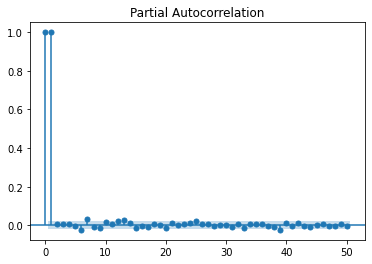

In [19]:
#use PACF to find ideal P value
#we will just use the closing values for now
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(df["Close"], lags=50)
plt.show()

We can see that the stock price is correlated strongly at a time lag of 1, (ie yesterdays price) howevever there is not much correlation between the price of two days ago. In the AFC plot you will see the correlation from the prevouse day carry over.

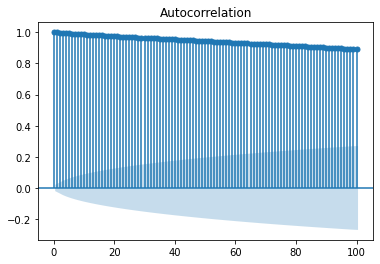

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close"], lags= 100)
plt.show()

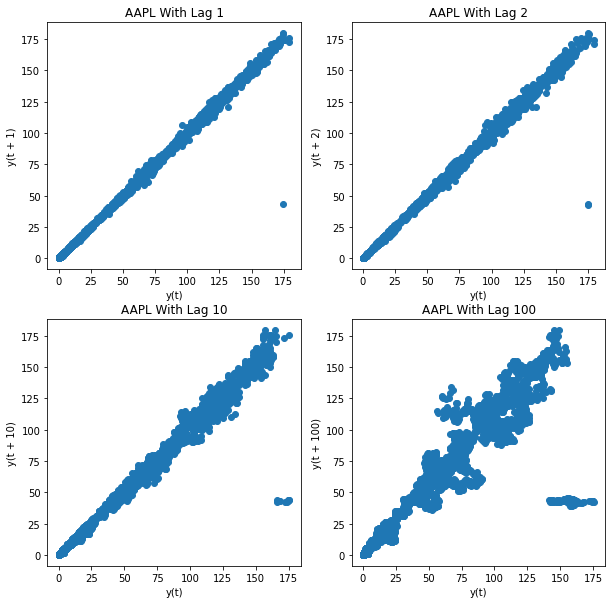

In [54]:
from pandas.plotting import lag_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10,10))
lag_plot(df["Close"], lag=1, ax=axes[0,0])
lag_plot(df["Close"], lag=2, ax=axes[0,1])
lag_plot(df["Close"], lag=10, ax=axes[1,0])
lag_plot(df["Close"], lag=100, ax=axes[1,1])
axes[0,0].title.set_text("AAPL With Lag 1")
axes[0,1].title.set_text("AAPL With Lag 2")
axes[1,0].title.set_text("AAPL With Lag 10")
axes[1,1].title.set_text("AAPL With Lag 100")

plt.show()

In [ ]:
#build the AR Model with lag 1

